<a href="https://colab.research.google.com/github/piyushHuman/Team-Data-Warriors-2022---Capstone-Project.ipynb/blob/main/Team_Data_Warriors_2022_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. 

## Explore and analyze the data to discover key understandings of the following important question to enhance bussiness of Airbnb
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Questions

1.What is the average preferred price on the Airbnb platform by the customers   on a particular location? 

2.Find top 10 hosts with most listings on the Airbnb platform?

3.Find total no. of nights spend per location by the customers?

4.What are the total of nights spends per room types by the customets?

5.Top 10 highest listing neighborhood on Airbnb platform?






In [1]:
# import all library that will be used in entire project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns

In [2]:
# Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# File path of Airbnb dataset in google drive 
file_path = '/content/drive/MyDrive/Alma better/EDA capstone project/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [4]:
# Complete Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
# Remove latitude, longitude, last_review and reviews_per_month columns from original dataset as there is no need of this data for our analysis 
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [9]:
# Apply dropna() function to entire dataset and drop null values with dropna() function 
airBnB_df = df.dropna()

In [10]:
# Information about our new non null dataframe
airBnB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [11]:
airBnB_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [12]:
airBnB_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [13]:
airBnB_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,Private room,90,7,0,1,23


In [14]:
# Sum of null values in dataset
airBnB_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
airBnB_df.iloc[:4]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194


In [16]:
airBnB_df.loc[45]

id                                                                            12627
name                              Entire apartment in central Brooklyn neighborh...
host_id                                                                       49670
host_name                                                                      Rana
neighbourhood_group                                                        Brooklyn
neighbourhood                                             Prospect-Lefferts Gardens
room_type                                                           Entire home/apt
price                                                                           150
minimum_nights                                                                   29
number_of_reviews                                                                11
calculated_host_listings_count                                                    1
availability_365                                                            

### **1.What is the average preferred price on the Airbnb platform by the customers on a particular location?**

In [17]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
# Let us create a dataframe which consists of only location .
location = pd.DataFrame(airBnB_df['neighbourhood_group'])
location


,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
48890,Brooklyn
48891,Brooklyn
48892,Manhattan
48893,Manhattan


In [ ]:
# Average_price of property according to the location
Avg_preffered_price_df = airBnB_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
Avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
# Unstack the group by information for plot the graph
Avg_preffered_price_df = airBnB_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
Avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


In [ ]:
sort_room_type = airBnB_df.groupby(['neighbourhood_group','room_type'])['room_type'].count()
sort_room_type

neighbourhood_group  room_type      
Bronx                Entire home/apt      378
                     Private room         652
                     Shared room           59
Brooklyn             Entire home/apt     9553
                     Private room       10123
                     Shared room          413
Manhattan            Entire home/apt    13190
                     Private room        7973
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3370
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64

In [ ]:
Avg_preffered_price_df.columns

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [ ]:
Avg_preffered_price_df.index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

<Figure size 1440x720 with 0 Axes>

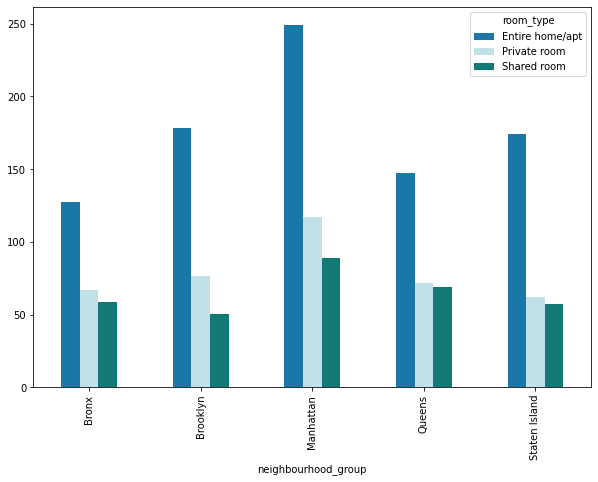

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Graph of average price of property according to location
Avg_preffered_price_df.plot.bar(color=['#1b77a8','#bee2e8','#117a75'])
plt.figure(figsize=(20,10))


 **Answer** : The average preferred price on the Airbnb platform 
              by the customers on a particular location and room_type.

              
            

**Bronx**           :      Entire home/apt      378,
                           Private room         652,
                           Shared room           59.

**Brooklyn**        :      Entire home/apt     9553,
                           Private room       10123,
                           Shared room          413.

**Manhattan**       :      Entire home/apt    13190,
                           Private room        7973,
                           Shared room          480.

**Queens**          :      Entire home/apt     2096,
                           Private room        3370,
                           Shared room          198.

**Staten Island**   :     Entire home/apt      176,
                          Private room         188,
                          Shared room            9.



**2. Find top 10 hosts with most listings on the Airbnb platform?**

In [ ]:
airBnB_df['host_name'].count()

48858

In [ ]:
airBnB_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
# Creating DataFrame
Count_host_name = list(airBnB_df['host_name'].value_counts())
Host_name = list(airBnB_df.host_name)
Listing_count= list(zip(Host_name,Count_host_name))
Count_host_id_df= pd.DataFrame(Listing_count)
Count_host_id_df.rename(columns={0:'Host_Name',1:'Counts'},inplace=True)

# Storing top 10 hosts with most listings
Top_host_id = Count_host_id_df.head(10)
Top_host_id

,Host_Name,Counts
0,John,417
1,Jennifer,403
2,Elisabeth,327
3,LisaRoxanne,294
4,Laura,279
5,Chris,232
6,Garon,227
7,Shunichi,226
8,MaryEllen,205
9,Ben,204


[Text(0, 0, 'John'),
 Text(0, 0, 'Jennifer'),
 Text(0, 0, 'Elisabeth'),
 Text(0, 0, 'LisaRoxanne'),
 Text(0, 0, 'Laura'),
 Text(0, 0, 'Chris'),
 Text(0, 0, 'Garon'),
 Text(0, 0, 'Shunichi'),
 Text(0, 0, 'MaryEllen'),
 Text(0, 0, 'Ben')]

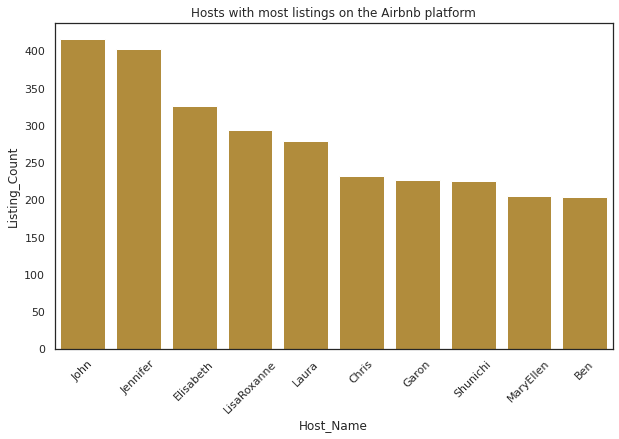

In [ ]:
# Setting the figure size
sns.set(rc={'figure.figsize':(10,6)})
# Setting background colour of chart as white
sns.set_style('white')
# Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Name', y= 'Counts', color='#c49329', data=Top_host_id,
                      order=Top_host_id.sort_values('Counts',ascending = False).Host_Name)
# Setting font size for title
sns.set(font_scale = 1)
# Naming the Chart
viz_bar.set_title('Hosts with most listings on the Airbnb platform')
# Naming X & Y axis
viz_bar.set_xlabel('Host_Name')
viz_bar.set_ylabel('Listing_Count')
# Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


**3.Find total no. of nights spend per location by the customers?**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
#  find the total no.of nights
Total_minimum_nights = pd.DataFrame(airBnB_df['minimum_nights']).sum()
Total_minimum_nights


minimum_nights    342614
dtype: int64

In [ ]:
Total_no_of_nights_spend = airBnB_df.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
Total_no_of_nights_spend.sort_values('minimum_nights',ascending=True)

,neighbourhood_group,minimum_nights
4,Staten Island,1802
0,Bronx,4971
3,Queens,29356
1,Brooklyn,121693
2,Manhattan,184792


[Text(0, 0, 'Bronx'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island')]

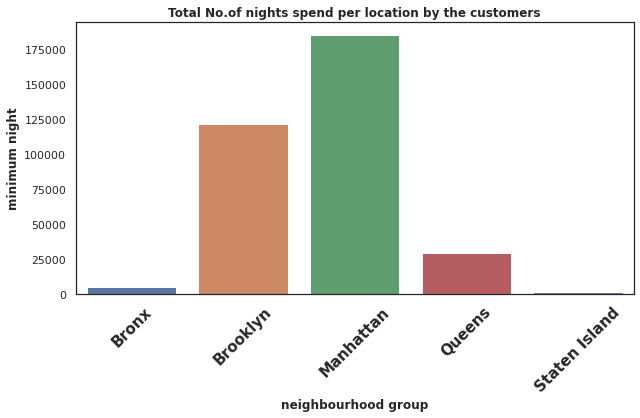

In [ ]:
from matplotlib import colors
from seaborn.widgets import color_palette
# visualization of total no. nights spend per location using seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
abc= sns.barplot(x='neighbourhood_group',y='minimum_nights',data = Total_no_of_nights_spend)
abc.set_title('Total No.of nights spend per location by the customers', Weight='bold')
abc.set_ylabel('minimum night', Weight='bold')
abc.set_xlabel('neighbourhood group', Weight='bold')
abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='15')

**4.What are the total of nights spends per room types by the customers?**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
Total_no_of_nights_spend_per_room = airBnB_df.groupby('room_type')['minimum_nights'].sum().reset_index()
Total_no_of_nights_spend_per_room

,room_type,minimum_nights
0,Entire home/apt,215081
1,Private room,120023
2,Shared room,7510


In [ ]:
# create dataset
labels = list(Total_no_of_nights_spend_per_room['room_type'])
values = list(Total_no_of_nights_spend_per_room['minimum_nights'])
# create color parameter
colors = ['#1d67c2','#5176b5','yellow']

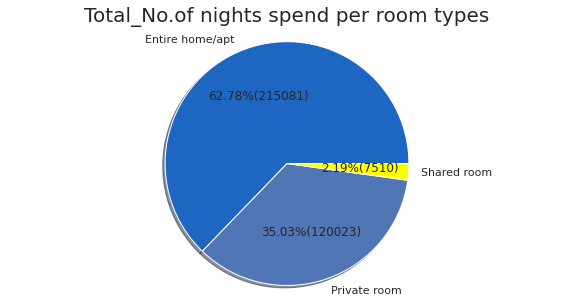

In [ ]:
# creating pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(values,labels=labels,colors=colors,autopct=make_autopct(values),shadow=True)
plt.title('Total_No.of nights spend per room types',fontsize=20)

plt.axis("equal")  
plt.show()

**5.Top 10 highest listing neighborhood on Airbnb platform?**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
Top_10_neighbourhood = airBnB_df['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
Top_10_neighbourhood


,index,neighbourhood
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


In [ ]:
# Make a copy of top 10 neighbourhood 
Highest_listing_count = Top_10_neighbourhood.copy()
Highest_listing_count.rename(columns={'index':'neighourhood','neighbourhood':'Highest_listing_value'},inplace=True)
var = Highest_listing_count[:10]
var

,neighourhood,Highest_listing_value
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
5,Hell's Kitchen,1954
6,East Village,1852
7,Upper East Side,1797
8,Crown Heights,1563
9,Midtown,1545


Text(0.5, 0, 'neighborhood')

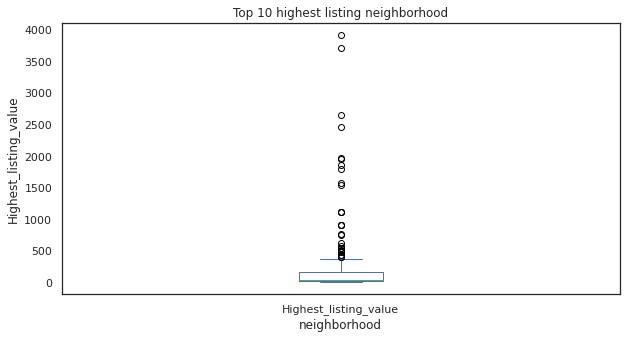

In [ ]:
# Create the plot object
plt.rcParams['figure.figsize'] = (10, 5)
Highest_listing_count.plot(kind="box")
#Highest_listing_count.plot()
plt.title('Top 10 highest listing neighborhood')
plt.ylabel('Highest_listing_value')
plt.xlabel('neighborhood')



***6. What can we learn about different hosts and areas?***


In [ ]:
airBnB_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [ ]:
# Here we will find out the total number of host id present in our dataset .
Total_no_of_host_id = pd.DataFrame(airBnB_df['host_id']).count()
Total_no_of_host_id

host_id    48858
dtype: int64

There are Total_no_of_host_id  **48858** in the dataset we identified.

In [ ]:
# Here we will find out the total number of host name present in our dataset .
Total_no_of_host_name = pd.DataFrame(airBnB_df['host_name']).count()
Total_no_of_host_name

host_name    48858
dtype: int64

There are Total_no_of_host_name  **48858** in the dataset we identified.

In [ ]:
# Here we will find out the total number of unique hosts present in our dataset .
Total_unique_host_name = pd.DataFrame(airBnB_df['host_name']).nunique()
Total_unique_host_name

host_name    11450
dtype: int64

There are Total_unique_host_name  **11450** in the dataset we identified.

In [ ]:
# Here we will find out the total number of unique hosts id present in our dataset .
Total_unique_host_id = pd.DataFrame(airBnB_df['host_id']).nunique()
Total_unique_host_id

host_id    37425
dtype: int64

There are Total_unique_host_id   **37425**  in the dataset we identified.

In [ ]:
# Here we will find out the different area and host name present in our dataset and their listings counts.
Different_host_area=airBnB_df.groupby(['host_name','neighbourhood'])['calculated_host_listings_count'].count().reset_index()
Different_host_area.sort_values('calculated_host_listings_count',ascending=False)


,host_name,neighbourhood,calculated_host_listings_count
25257,Sonder (NYC),Financial District,218
13235,John,Hell's Kitchen,55
27576,Vida,Greenpoint,52
25252,Sonder,Financial District,51
25464,Stanley,Murray Hill,50
...,...,...,...
11063,Ilse,West Village,1
11062,Ilsa,Prospect Heights,1
11060,Ilona,South Slope,1
11059,Ilona,Sheepshead Bay,1


In [ ]:
Areas = airBnB_df.neighbourhood.unique()
Areas[:10]

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown'], dtype=object)

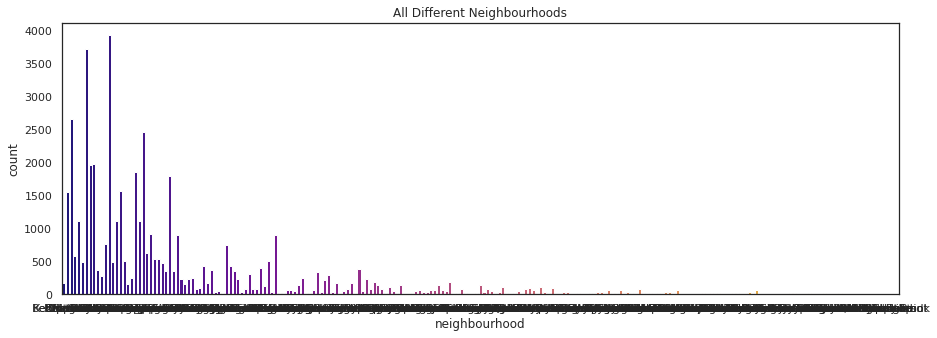

In [ ]:
# All Different Areas
sns.countplot(x = airBnB_df['neighbourhood'], palette="plasma",orient='h',saturation=0.75)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('All Different Neighbourhoods')
#plt.xlabel('Areas')
plt.show()

**7.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
# Here we are trying to find out the mean price for the different location and doing ploting for same.
Area_group = airBnB_df.groupby(['neighbourhood_group'])
Area_group

In [ ]:
Area_group.mean()['price'].sort_values(ascending = False)

neighbourhood_group
Manhattan        196.897473
Brooklyn         124.410523
Staten Island    114.812332
Queens            99.536017
Bronx             87.469238
Name: price, dtype: float64

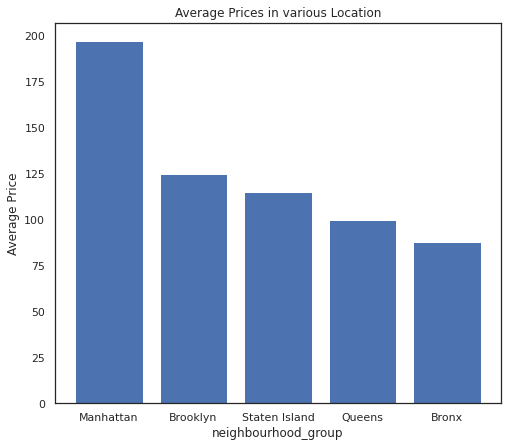

In [ ]:
# Let us plot a Bar Graph for the mean prices of all neighbourgood_group
plt.figure(figsize=(8,7))
plt.bar(Area_group.mean()['price'].sort_values(ascending = False).keys(),Area_group.mean()['price'].sort_values(ascending = False))
plt.title('Average Prices in various Location')
plt.xlabel("neighbourhood_group")
plt.ylabel('Average Price')
plt.show()

In [ ]:
Room_type_group =airBnB_df.groupby(['room_type'])
Room_type_group.mean()['price'].sort_values(ascending=False)


room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
Name: price, dtype: float64

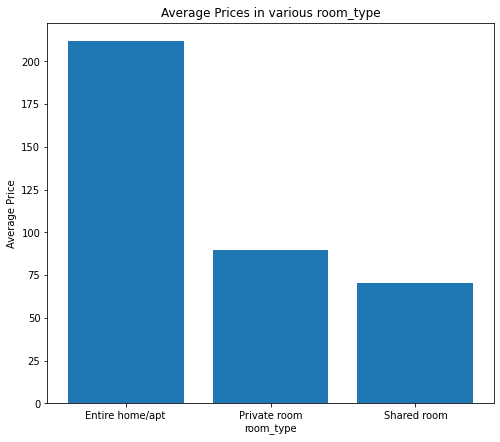

In [ ]:
# Let us plot a Bar Graph for the mean prices of all neighbourgood_group
plt.figure(figsize=(8,7))
plt.bar(Room_type_group.mean()['price'].sort_values(ascending = False).keys(),Room_type_group.mean()['price'].sort_values(ascending = False))
plt.title('Average Prices in various room_type')
plt.xlabel("room_type")
plt.ylabel('Average Price')
plt.show()

In [ ]:
# LET US PLOT THE GRAPH FOR NUMBER OF REVIEW VS BOOKING_ID COUNT
Review_counts = airBnB_df.groupby(['number_of_reviews'])['id'].count() 
Review_counts.sort_values(ascending= False)[0:11]

number_of_reviews
0     10037
1      5239
2      3464
3      2519
4      1994
5      1615
6      1356
7      1179
8      1127
9       964
10      803
Name: id, dtype: int64

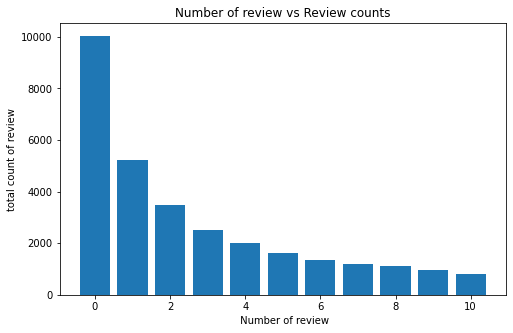

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(Review_counts.sort_values(ascending= False)[0:11].keys(),Review_counts.sort_values(ascending= False)[0:11])
plt.title('Number of review vs Review counts')
plt.xlabel(" Number of review")
plt.ylabel('total count of review')
plt.show()


***8.Which hosts are the busiest and why?***

In [ ]:
#LETS FIND THE UNIQUE HOST IN OUR DATASET
uniq_host = pd.DataFrame(airBnB_df['host_name'].unique(),columns = ['host_name'])
uniq_host


,host_name
0,John
1,Jennifer
2,Elisabeth
3,LisaRoxanne
4,Laura
...,...
11445,Molo
11446,Qizhi
11447,Abayomi
11448,Alberth


**We can see that there are 11450 rows of the data frame, with this we can say that there are 11450 unique hosts in our data set.**

In [24]:
#WE CAN FIND THE BUISEST HOST BY CALCULATING NUMBER OF REVIEWS THE HOST IS GETTING

review_count = airBnB_df.groupby(['host_name','room_type'])['number_of_reviews'].max().reset_index()
review_count.sort_values(by = 'number_of_reviews', ascending=False)
review_count10 = review_count.sort_values(by = 'number_of_reviews', ascending=False).head(10)
review_count10

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6332,Jj,Private room,607
8977,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510
1214,Asa,Entire home/apt,488
13839,Wanda,Private room,480
7902,Linda,Private room,474
2947,Dani,Entire home/apt,467
863,Angela,Private room,466


**From the above analysis it is clear that few of the top busiest host are Dona,Jj,Maya,Carol,Danielle and Asa.**

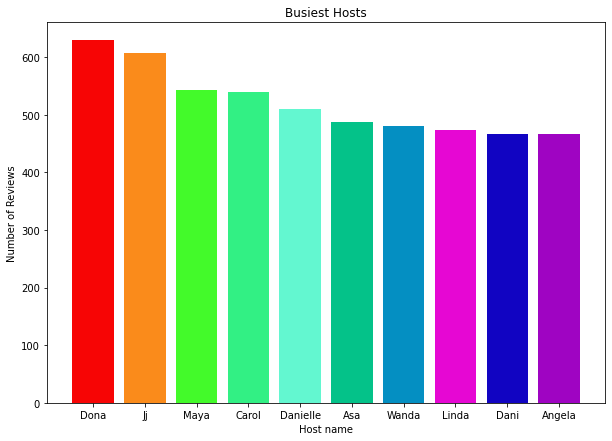

In [26]:
#NOW LETS PLOT A GRAPH FOR A PICTORIAL REPRESENTATION THE DATA
host_name = review_count10['host_name']
revw = review_count10['number_of_reviews']
colors = ['#f70505','#fa8b1b','#43fa2a','#32f084','#63f7d0','#04c289','#048fc2','#e607d3','#1104c2','#9f04c2']
plt.bar(host_name,revw,color = colors )
plt.xlabel("Host name")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()



***From the above graph we can say that the busiest host are:

 Dona
 , Jj, Maya
 , Carol and
 Danielle
 
According to their reviews count. These host are having more rewiews because they have a listing of private rooms and entire apartment and people use stay more in private rooms and apartment *** 

# ***9.Is there any noticeable difference of traffic among different areas and what could be the reason for it?***

In [18]:
#WE CAN FIND THE TRAFFIC OF THE AREA BY CALCULATING MINIMUM NIGHTS SPEND BY THE PEOPLE IN THE PARTICULAR AREA

nights_count = airBnB_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
area_traffic = nights_count.sort_values(by = 'minimum_nights',ascending = False)
area_traffic

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13190
4,Brooklyn,Private room,10123
3,Brooklyn,Entire home/apt,9553
7,Manhattan,Private room,7973
10,Queens,Private room,3370
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,378


From the above analysis we can see that the minimum nights spent by the people are in Manhattan in entire home/apartment.We can also say that

1. Manhattan
2. Brooklyn
3. Queens

Have the huge traffic because people prefer more to stay in private room and  entire home/apartment.We can clearly see that these neighbourhood are proving more private rooms and entire home/apartment.



Text(0.5, 1.0, 'Traffic of area according to minimum nights')

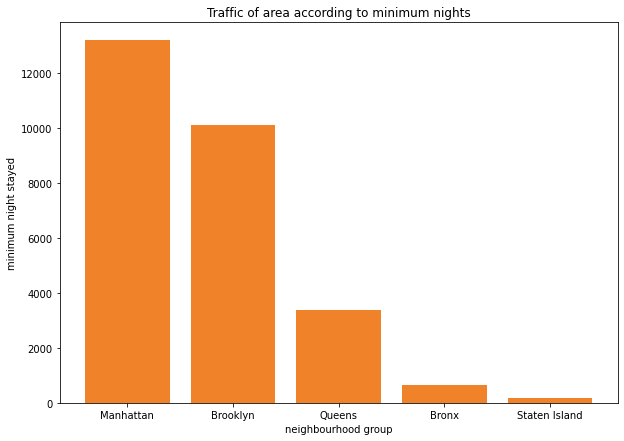

In [22]:
#NOW LETS PLOT THE GRAPH OF ABOVE ANALYSIS FOR THE PICTORICAL REPRESENTATION OF THE ANALYSIS
area = area_traffic['neighbourhood_group']
stay = area_traffic['minimum_nights']
#colors = ['#f70505','#fa8b1b','#43fa2a','#32f084','#63f7d0']
plt.bar(area,stay,color = '#f08229')
plt.xlabel('neighbourhood group')
plt.ylabel('minimum night stayed')
plt.title('Traffic of area according to minimum nights')

